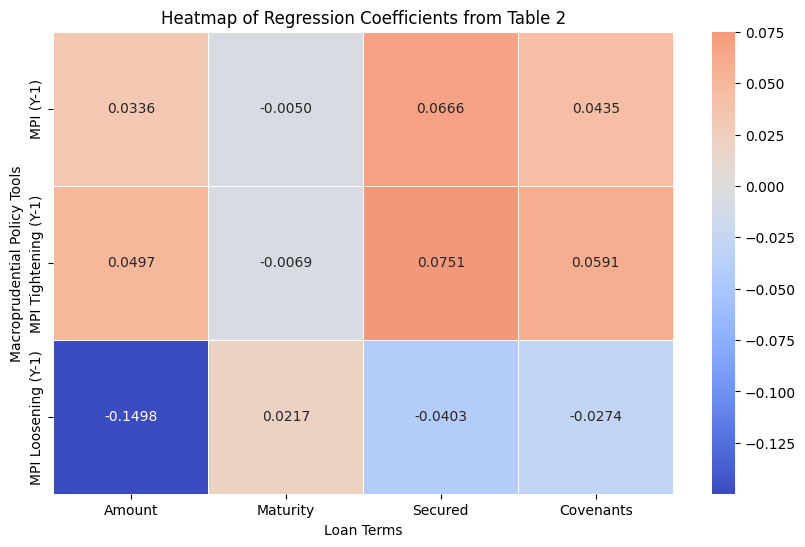

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data extracted from Table 2
data = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0336, 0.0497, -0.1498],
    'Maturity': [-0.0050, -0.0069, 0.0217],
    'Secured': [0.0666, 0.0751, -0.0403],
    'Covenants': [0.0435, 0.0591, -0.0274]
}

# Standard errors (not used in the heatmap but useful for annotations)
std_errors = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0205, 0.0220, 0.0999],
    'Maturity': [0.0080, 0.0085, 0.0315],
    'Secured': [0.0226, 0.0237, 0.1088],
    'Covenants': [0.0464, 0.0493, 0.1564]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
se_df = pd.DataFrame(std_errors)

# Set 'Policy Tool' as the index
df.set_index('Policy Tool', inplace=True)
se_df.set_index('Policy Tool', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".4f", annot_kws={"size": 10})
plt.title('Heatmap of Regression Coefficients from Table 2')
plt.xlabel('Loan Terms')
plt.ylabel('Macroprudential Policy Tools')

# Adding annotations for statistical significance
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        value = df.iloc[y, x]
        se = se_df.iloc[y, x]
        ax.text(x + 0.5, y + 0.5, significance, color='black', ha='center', va='center', fontsize=12)

plt.show()


c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


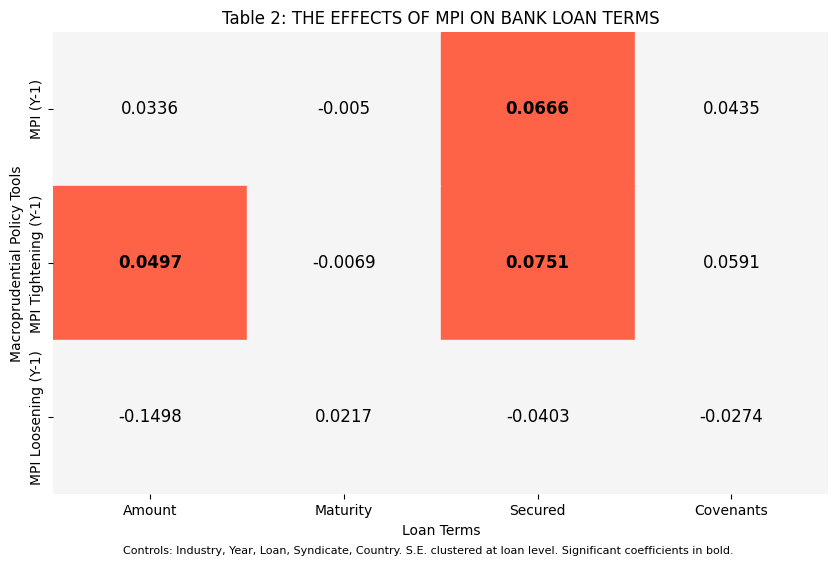

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data extracted from Table 2
data = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0336, 0.0497, -0.1498],
    'Maturity': [-0.0050, -0.0069, 0.0217],
    'Secured': [0.0666, 0.0751, -0.0403],
    'Covenants': [0.0435, 0.0591, -0.0274]
}

# Standard errors
std_errors = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0205, 0.0220, 0.0999],
    'Maturity': [0.0080, 0.0085, 0.0315],
    'Secured': [0.0226, 0.0237, 0.1088],
    'Covenants': [0.0464, 0.0493, 0.1564]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
se_df = pd.DataFrame(std_errors)

# Set 'Policy Tool' as the index
df.set_index('Policy Tool', inplace=True)
se_df.set_index('Policy Tool', inplace=True)

def significance(coef, se):
    z_score = coef / se
    if abs(z_score) > 1.6449:  # 10% significance level
        return 'significant'
    else:
        return ''

# Determine the color based on significance and coefficient sign
def determine_color(coef, se):
    if significance(coef, se) == '':
        return 'whitesmoke'  # Neutral color for non-significant coefficients
    elif coef > 0:
        return 'tomato'  # Positive significant coefficients
    else:
        return 'limegreen'  # Negative significant coefficients

# Create a matrix of colors
colors = np.vectorize(determine_color)(df.values, se_df.values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".4f", annot_kws={"size": 10},
                 mask=(df == df), cbar=False)  # Disable default colormap

# Overlaying with the colored rectangles
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        font_weight = 'bold' if significance(df.iloc[y, x], se_df.iloc[y, x]) == 'significant' else 'normal'
        plt.text(x + 0.5, y + 0.5, df.iloc[y, x], color='black', ha='center', va='center', fontsize=12, weight=font_weight)
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=colors[y, x], lw=1))
        
plt.title('Table 2: THE EFFECTS OF MPI ON BANK LOAN TERMS')
plt.xlabel('Loan Terms')
plt.ylabel('Macroprudential Policy Tools')
plt.figtext(0.5, 0.01, "Controls: Industry, Year, Loan, Syndicate, Country. S.E. clustered at loan level. Significant coefficients in bold.", ha="center", fontsize=8)
plt.show()


c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


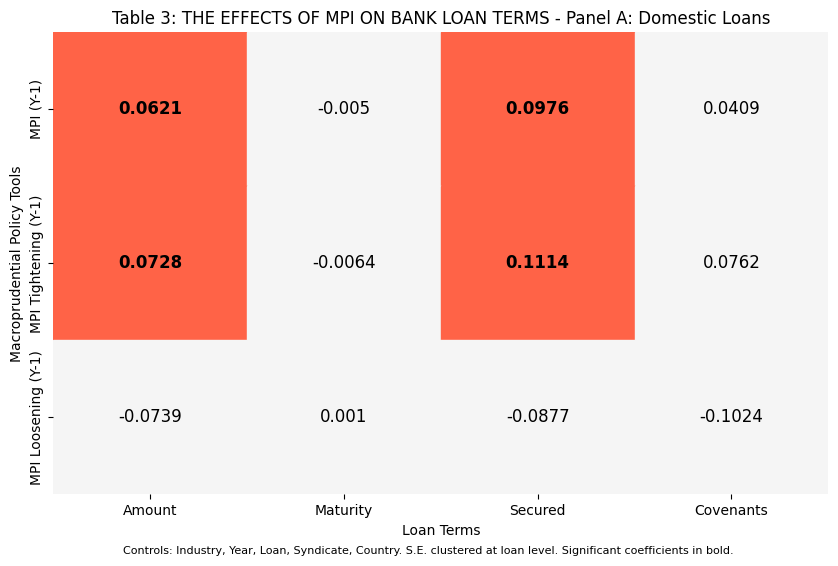

c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


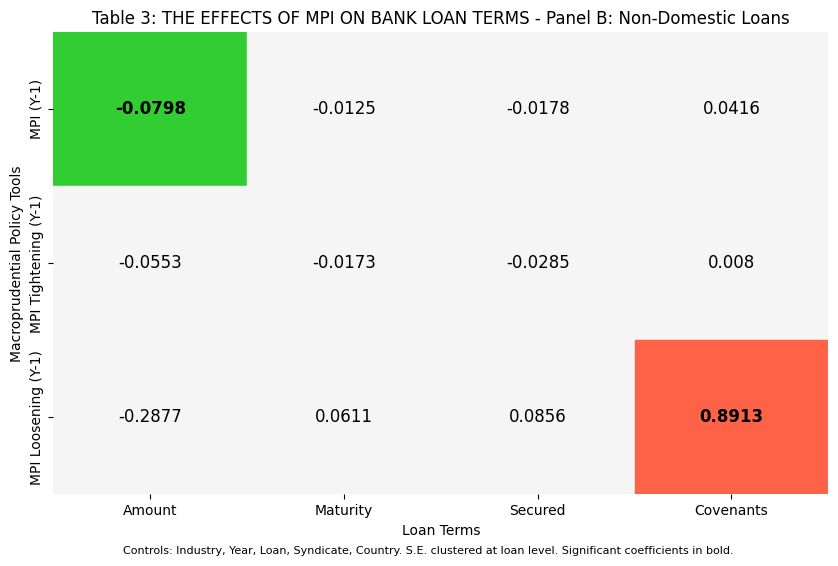

In [25]:
# Data extracted from Table 3
data_domestic = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0621, 0.0728, -0.0739],
    'Maturity': [-0.0050, -0.0064, 0.0010],
    'Secured': [0.0976, 0.1114, -0.0877],
    'Covenants': [0.0409, 0.0762, -0.1024]
}

data_nondomestic = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [-0.0798, -0.0553, -0.2877],
    'Maturity': [-0.0125, -0.0173, 0.0611],
    'Secured': [-0.0178, -0.0285, 0.0856],
    'Covenants': [0.0416, 0.0080, 0.8913]
}

# Standard errors
std_errors_domestic = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0250, 0.0262, 0.1116],
    'Maturity': [0.0105, 0.0111, 0.0360],
    'Secured': [0.0286, 0.0299, 0.1123],
    'Covenants': [0.0575, 0.0584, 0.1558]
}

std_errors_nondomestic = {
    'Policy Tool': ['MPI (Y-1)', 'MPI Tightening (Y-1)', 'MPI Loosening (Y-1)'],
    'Amount': [0.0343, 0.0380, 0.2230],
    'Maturity': [0.0135, 0.0143, 0.0648],
    'Secured': [0.0419, 0.0446, 0.2256],
    'Covenants': [0.0636, 0.0720, 0.5067]
}

# Convert the dictionary to a pandas DataFrame
df_domestic = pd.DataFrame(data_domestic)
se_df_domestic = pd.DataFrame(std_errors_domestic)

df_nondomestic = pd.DataFrame(data_nondomestic)
se_df_nondomestic = pd.DataFrame(std_errors_nondomestic)

# Set 'Policy Tool' as the index
df_domestic.set_index('Policy Tool', inplace=True)
se_df_domestic.set_index('Policy Tool', inplace=True)

df_nondomestic.set_index('Policy Tool', inplace=True)
se_df_nondomestic.set_index('Policy Tool', inplace=True)

def significance(coef, se):
    z_score = coef / se
    if abs(z_score) > 1.6449:  # 10% significance level
        return 'significant'
    else:
        return ''

# Determine the color based on significance and coefficient sign
def determine_color(coef, se):
    if significance(coef, se) == '':
        return 'whitesmoke'  # Neutral color for non-significant coefficients
    elif coef > 0:
        return 'tomato'  # Positive significant coefficients
    else:
        return 'limegreen'  # Negative significant coefficients

# Create a matrix of colors
colors_domestic = np.vectorize(determine_color)(df_domestic.values, se_df_domestic.values)
colors_nondomestic = np.vectorize(determine_color)(df_nondomestic.values, se_df_nondomestic.values)

# Plotting the heatmap for domestic loans
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_domestic, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".4f", annot_kws={"size": 10},
                 mask=(df_domestic == df_domestic), cbar=False)  # Disable default colormap

# Overlaying with the colored rectangles
for y in range(df_domestic.shape[0]):
    for x in range(df_domestic.shape[1]):
        font_weight = 'bold' if significance(df_domestic.iloc[y, x], se_df_domestic.iloc[y, x]) == 'significant' else 'normal'
        plt.text(x + 0.5, y + 0.5, df_domestic.iloc[y, x], color='black', ha='center', va='center', fontsize=12, weight=font_weight)
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=colors_domestic[y, x], lw=1))
        
plt.title('Table 3: THE EFFECTS OF MPI ON BANK LOAN TERMS - Panel A: Domestic Loans')
plt.xlabel('Loan Terms')
plt.ylabel('Macroprudential Policy Tools')
plt.figtext(0.5, 0.01, "Controls: Industry, Year, Loan, Syndicate, Country. S.E. clustered at loan level. Significant coefficients in bold.", ha="center", fontsize=8)
plt.show()

# Plotting the heatmap for non-domestic loans
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df_nondomestic, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".4f", annot_kws={"size": 10},
                 mask=(df_nondomestic == df_nondomestic), cbar=False)  # Disable default colormap

# Overlaying with the colored rectangles
for y in range(df_nondomestic.shape[0]):
    for x in range(df_nondomestic.shape[1]):
        font_weight = 'bold' if significance(df_nondomestic.iloc[y, x], se_df_nondomestic.iloc[y, x]) == 'significant' else 'normal'
        plt.text(x + 0.5, y + 0.5, df_nondomestic.iloc[y, x], color='black', ha='center', va='center', fontsize=12, weight=font_weight)
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=colors_nondomestic[y, x], lw=1))
        
plt.title('Table 3: THE EFFECTS OF MPI ON BANK LOAN TERMS - Panel B: Non-Domestic Loans')
plt.xlabel('Loan Terms')
plt.ylabel('Macroprudential Policy Tools')
plt.figtext(0.5, 0.01, "Controls: Industry, Year, Loan, Syndicate, Country. S.E. clustered at loan level. Significant coefficients in bold.", ha="center", fontsize=8)
plt.show()

c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\GODLEWSKI\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


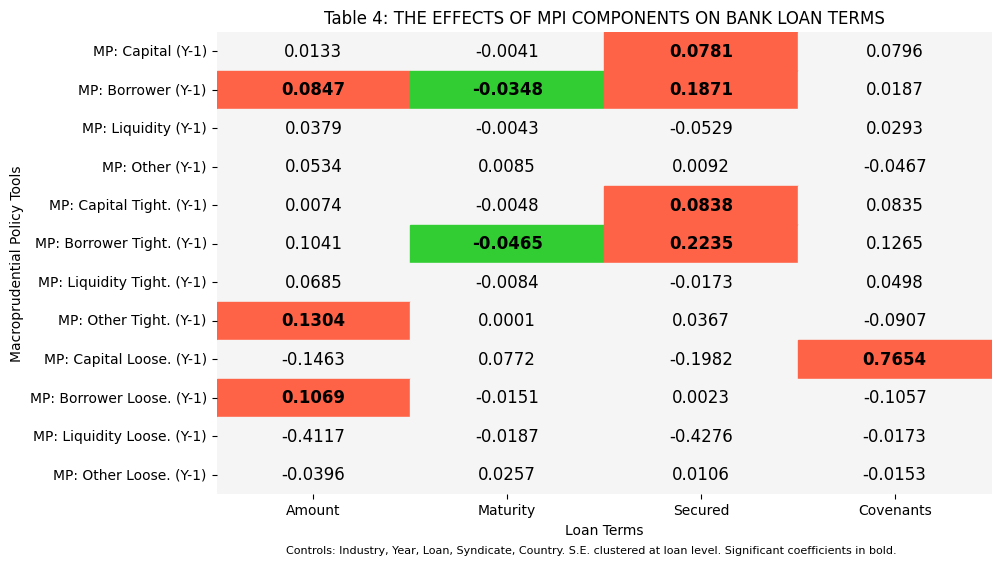

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data extracted from the table 4
data = {
    'Policy Tool': ['MP: Capital (Y-1)', 'MP: Borrower (Y-1)', 'MP: Liquidity (Y-1)', 'MP: Other (Y-1)', 
                    'MP: Capital Tight. (Y-1)', 'MP: Borrower Tight. (Y-1)', 'MP: Liquidity Tight. (Y-1)', 'MP: Other Tight. (Y-1)',
                    'MP: Capital Loose. (Y-1)', 'MP: Borrower Loose. (Y-1)', 'MP: Liquidity Loose. (Y-1)', 'MP: Other Loose. (Y-1)'],
    'Amount': [0.0133, 0.0847, 0.0379, 0.0534, 0.0074, 0.1041, 0.0685, 0.1304, -0.1463, 0.1069, -0.4117, -0.0396],
    'Maturity': [-0.0041, -0.0348, -0.0043, 0.0085, -0.0048, -0.0465, -0.0084, 0.0001, 0.0772, -0.0151, -0.0187, 0.0257],
    'Secured': [0.0781, 0.1871, -0.0529, 0.0092, 0.0838, 0.2235, -0.0173, 0.0367, -0.1982, 0.0023, -0.4276, 0.0106],
    'Covenants': [0.0796, 0.0187, 0.0293, -0.0467, 0.0835, 0.1265, 0.0498, -0.0907, 0.7654, -0.1057, -0.0173, -0.0153]
}

# Standard errors
std_errors = {
    'Policy Tool': ['MP: Capital (Y-1)', 'MP: Borrower (Y-1)', 'MP: Liquidity (Y-1)', 'MP: Other (Y-1)', 
                    'MP: Capital Tight. (Y-1)', 'MP: Borrower Tight. (Y-1)', 'MP: Liquidity Tight. (Y-1)', 'MP: Other Tight. (Y-1)',
                    'MP: Capital Loose. (Y-1)', 'MP: Borrower Loose. (Y-1)', 'MP: Liquidity Loose. (Y-1)', 'MP: Other Loose. (Y-1)'],
    'Amount': [0.0276, 0.0465, 0.0764, 0.0457, 0.0293, 0.0644, 0.0714, 0.0576, 0.1671, 0.0602, 0.2571, 0.0840],
    'Maturity': [0.0117, 0.0189, 0.0211, 0.0148, 0.0122, 0.0241, 0.0191, 0.0173, 0.0817, 0.0285, 0.0587, 0.0289],
    'Secured': [0.0322, 0.0665, 0.0743, 0.0438, 0.0336, 0.0754, 0.0689, 0.0576, 0.2129, 0.1071, 0.2878, 0.0687],
    'Covenants': [0.0637, 0.1514, 0.1169, 0.1030, 0.0709, 0.1962, 0.1158, 0.1119, 0.3314, 0.1017, 0.3176, 0.1923]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)
se_df = pd.DataFrame(std_errors)

# Set 'Policy Tool' as the index
df.set_index('Policy Tool', inplace=True)
se_df.set_index('Policy Tool', inplace=True)

def significance(coef, se):
    z_score = coef / se
    if abs(z_score) > 1.6449:  # 10% significance level
        return 'significant'
    else:
        return ''

# Determine the color based on significance and coefficient sign
def determine_color(coef, se):
    if significance(coef, se) == '':
        return 'whitesmoke'  # Neutral color for non-significant coefficients
    elif coef > 0:
        return 'tomato'  # Positive significant coefficients
    else:
        return 'limegreen'  # Negative significant coefficients

# Create a matrix of colors
colors = np.vectorize(determine_color)(df.values, se_df.values)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df, annot=True, cmap='coolwarm', center=0, linewidths=.5, fmt=".4f", annot_kws={"size": 10},
                 mask=(df == df), cbar=False)  # Disable default colormap

# Overlaying with the colored rectangles
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        font_weight = 'bold' if significance(df.iloc[y, x], se_df.iloc[y, x]) == 'significant' else 'normal'
        plt.text(x + 0.5, y + 0.5, df.iloc[y, x], color='black', ha='center', va='center', fontsize=12, weight=font_weight)
        plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=True, color=colors[y, x], lw=1))
        
plt.title('Table 4: THE EFFECTS OF MPI COMPONENTS ON BANK LOAN TERMS')
plt.xlabel('Loan Terms')
plt.ylabel('Macroprudential Policy Tools')
plt.figtext(0.5, 0.01, "Controls: Industry, Year, Loan, Syndicate, Country. S.E. clustered at loan level. Significant coefficients in bold.", ha="center", fontsize=8)
plt.show()